In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

There is 891 rows and 12 columns are there in that Survived is the my target column in that data set

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#check the number of missing i each columns
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling the missing values

In [ ]:
#Droppig the cabin columns as maximum data is missing
df=df.drop("Cabin",axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.shape

(891, 11)

In [ ]:
#replacing the age column with mean values of age in the dataset
df["Age"].fillna(df["Age"].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Replace the Embarked column in this columns only three values are there replce with most repeated values

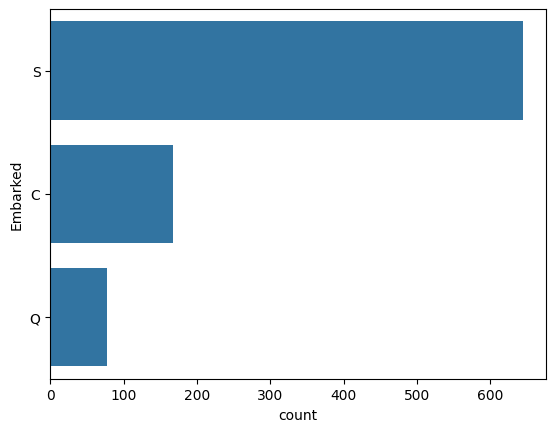

In [ ]:
sns.countplot(df["Embarked"])
plt.show()

In [ ]:
#Finding the mode value of embarked column
print(df["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#replace the  missing values in Embarked columns with mode
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


There is no missing values now

In [ ]:
#Caluclating the descriptive statastics of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival Rate: Only around 38.38% of passengers survived.
Passenger Class: Most passengers were in the 2nd and 3rd class (mean around 2.3).
Age Distribution: The average age is 29.7 years, but there is a wide range with some passengers being as young as 0.42 and as old as 80.
Fare Distribution: Fares vary widely, with a large number of passengers paying relatively low fares (median around 14.45) but some paying much higher amounts.

In [ ]:
df.describe(include='O')


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


The majority of passengers were male (577 out of 891).
Southampton (S) was the most common embarkation port for the passengers, with 646 passengers starting their journey from there.
There is some ticket sharing, as evidenced by the fact that the top ticket number appeared 7 times, likely indicating groups or families traveling together.

Visual Data Analysis

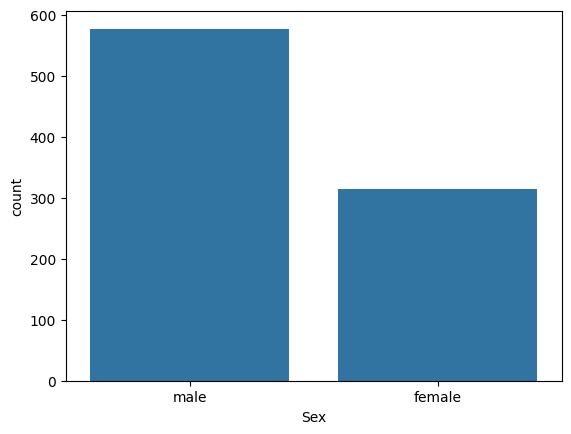

,count
Sex,
male,577
female,314


In [ ]:
sns.countplot(x='Sex',data=df)
plt.show()
df['Sex'].value_counts()

Male count is 577 and female count is 314

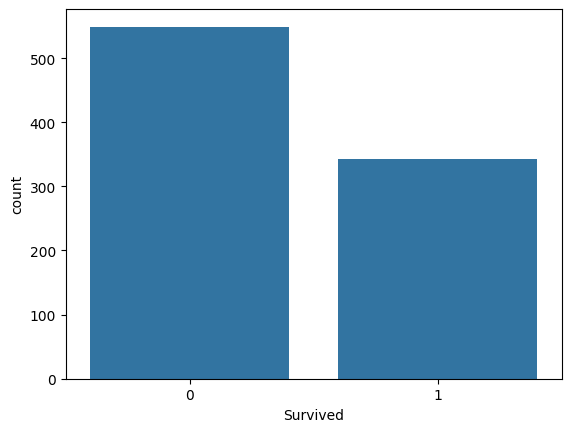

,count
Survived,
0,549
1,342


In [ ]:
sns.countplot(x='Survived',data=df)
plt.show()
df['Survived'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


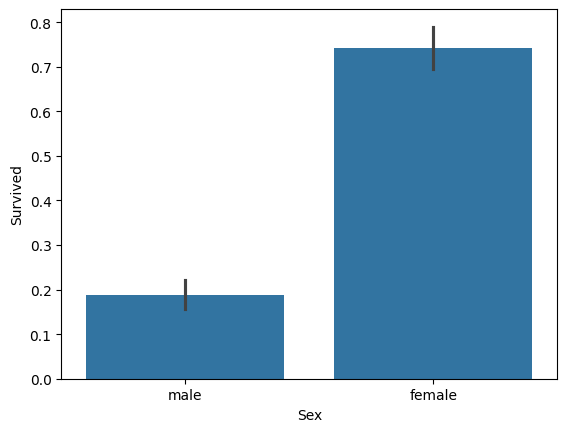

In [ ]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

number of female who survived was much more than the males who survived i.e. 74% females as against to 18% males

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


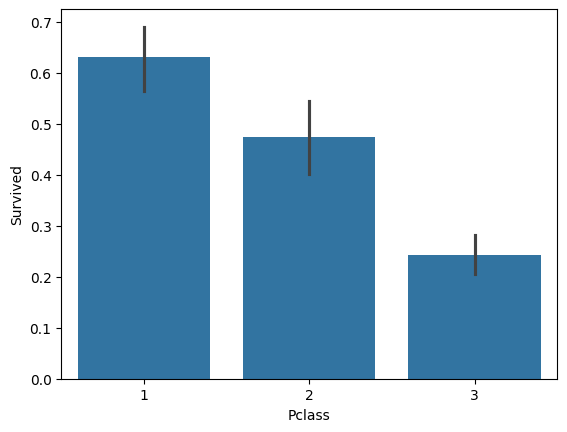

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

from bar char Pclass = 1 had a huge advantage. ie mre survival rate

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


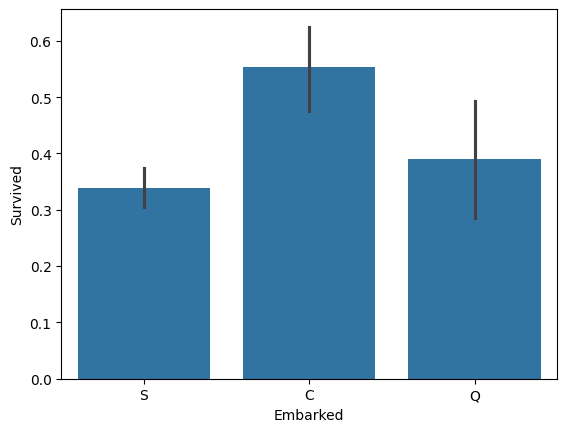

In [ ]:
sns.barplot(x='Embarked',y='Survived',data=df)
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Cherbourg had a higher rate of Survival at 55%

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


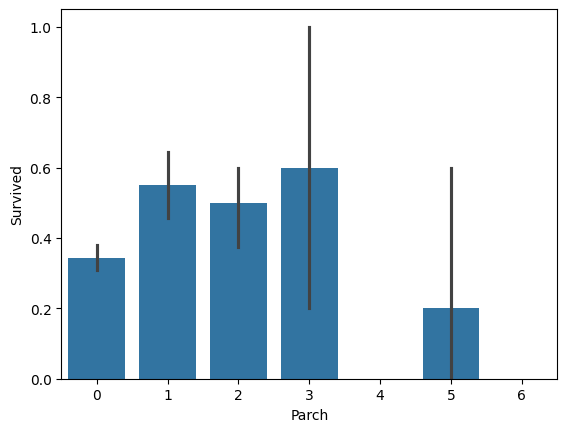

In [ ]:
sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


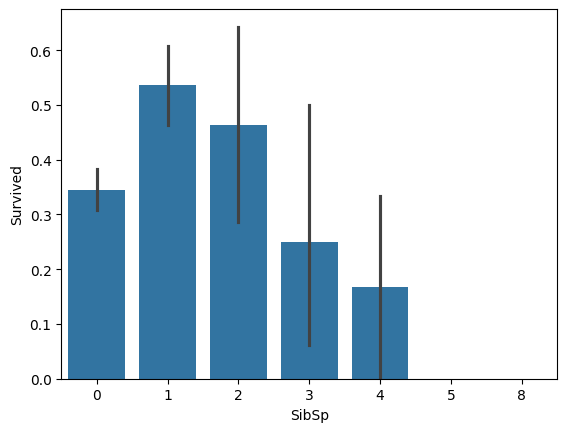

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

spouse or 1 sibling had a positive effect on Survival as compared to being alone

Encoding the Categorialcolumns

In [ ]:
#Converting the categorical columns
df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
#sSeperating the numercil columns and categorical columns
categorical_columns=[]
numerical_columns=[]
for i in df.columns:
  if df[i].dtypes=="object":
    categorical_columns.append(i)
  else:
    numerical_columns.append(i)
print("categorial columns",categorical_columns)
print("Numerical columns",numerical_columns)


categorial columns ['Name', 'Ticket']
Numerical columns ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


<ipython-input-84-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-84-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-84-c8bf6db6adef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

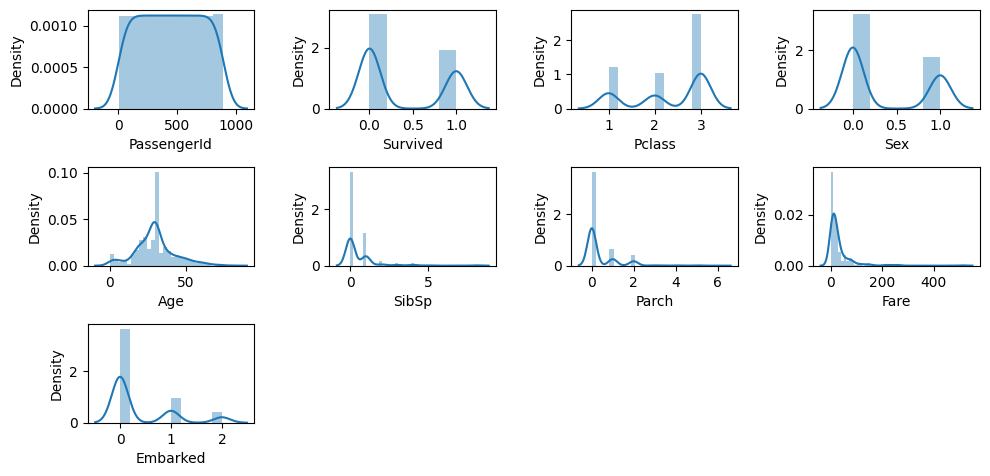

In [ ]:
#Distributon of the data
#Now check the distribution of the data in remaing column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_columns:
  if plotnumber<=25:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

The Survived and Sex plots suggest a large proportion of males and non-survivors.
Pclass and Fare indicate that the majority of passengers were in 3rd class and paid lower fares.
The Age distribution shows that most passengers were relatively young, around 20-30 years old.
Both SibSp and Parch distributions are highly skewed, with most passengers traveling alone or with just one family member.

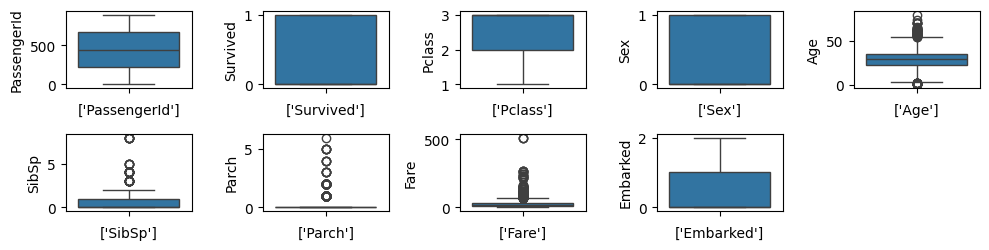

In [ ]:
#Checking the outliers
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_columns:
  if plotnumber<=17:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel([col])
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

The Fare and SibSp plots show more outliers, indicating that some passengers had unusually high family sizes or paid much more for their tickets.

In [ ]:
# Removing the outliers using the Z-score
from scipy.stats import zscore

# List the columns you want to check for outliers
columns = ["SibSp", "Fare"]

# Calculate the Z-scores for the specified columns
z = np.abs(zscore(df[columns]))

# Define the threshold for identifying outliers
threshold = 3

# Filter the rows where all Z-scores are below the threshold (i.e., no outliers)
new_df = df[(z < threshold).all(axis=1)]

# Display the filtered DataFrame
print(new_df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  .

In [ ]:
#Checking for Skewness
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in new_df.columns:
  if new_df[i].dtypes=="object":
    # Use new_df instead of df to ensure matching shapes
    new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))

<ipython-input-98-ae4c3a8d8b8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))
<ipython-input-98-ae4c3a8d8b8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i]=oe.fit_transform(new_df[i].values.reshape(-1,1))


In [ ]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,94.0,0,22.000000,1,0,519.0,7.2500,0
1,2,1,1,175.0,1,38.000000,1,0,589.0,71.2833,1
2,3,1,3,327.0,1,26.000000,0,0,659.0,7.9250,0
3,4,1,1,251.0,1,35.000000,1,0,48.0,53.1000,0
4,5,0,3,14.0,0,35.000000,0,0,468.0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,520.0,0,27.000000,0,0,99.0,13.0000,0
887,888,1,1,277.0,1,19.000000,0,0,14.0,30.0000,0
888,889,0,3,387.0,1,29.699118,1,2,665.0,23.4500,0
889,890,1,1,68.0,0,26.000000,0,0,8.0,30.0000,1


In [ ]:
new_df.skew()

,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,1.936407
Parch,3.283014
Ticket,0.027144
Fare,2.320654


In [ ]:
#removng the skenwness

In [ ]:
new_df["SibSp"]=np.cbrt(new_df["SibSp"])
new_df.skew()

<ipython-input-103-6d76fb5b361b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["SibSp"]=np.cbrt(new_df["SibSp"])


,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,0.985425
Parch,3.283014
Ticket,0.027144
Fare,2.320654


In [ ]:
new_df["Parch"]=np.cbrt(new_df["Parch"])
new_df.skew()

<ipython-input-104-4d3b6c443bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Parch"]=np.cbrt(new_df["Parch"])


,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,0.985425
Parch,1.617026
Ticket,0.027144
Fare,2.320654


In [ ]:
new_df["Fare"]=np.cbrt(new_df["Fare"])
new_df.skew()

<ipython-input-105-b30fdaa74ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Fare"]=np.cbrt(new_df["Fare"])


,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,0.985425
Parch,1.617026
Ticket,0.027144
Fare,0.684169


In [ ]:
new_df["Embarked"]=np.cbrt(new_df["Embarked"])
new_df.skew()

<ipython-input-107-2a16591f7d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Embarked"]=np.cbrt(new_df["Embarked"])


,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,0.985425
Parch,1.617026
Ticket,0.027144
Fare,0.684169


In [ ]:
new_df["Parch"]=np.cbrt(new_df["Parch"])
new_df.skew()

<ipython-input-108-4d3b6c443bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Parch"]=np.cbrt(new_df["Parch"])


,0
PassengerId,-0.008134
Survived,0.467243
Pclass,-0.641875
Name,0.000000
Sex,0.643030
Age,0.495402
SibSp,0.985425
Parch,1.489874
Ticket,0.027144
Fare,0.684169


Removed skewnwss and outliers

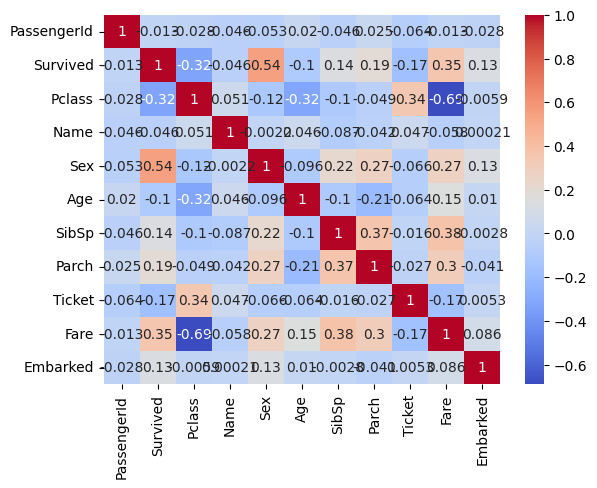

In [ ]:
sns.heatmap(new_df.corr(),annot=True,cmap="coolwarm")
plt.show()

#Dividing the target and feature variables

In [ ]:
X=new_df.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
y=new_df["Survived"]

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[841 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(841, 7) (672, 7) (169, 7)


Model building
When the target column has only two values, the problem is a binary classification problem. There are several models that are suitable for binary classification, depending on the nature of your data. Below are some commonly used models:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
lr_acc=accuracy_score(y_test,lr_pred)*100
print("Accuracy socre",lr_acc)
print("R score",r2_score(y_test,lr_pred))
print("Mean squared error",mean_squared_error(y_test,lr_pred))
print("Mean absolte  error",mean_absolute_error(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

Accuracy socre 83.4319526627219
R score 0.27087827426810485
Mean squared error 0.16568047337278108
Mean absolte  error 0.16568047337278108
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.79      0.71      0.75        59

    accuracy                           0.83       169
   macro avg       0.82      0.81      0.81       169
weighted avg       0.83      0.83      0.83       169



In [ ]:
#Support vector
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)


In [ ]:
svc_acc=accuracy_score(y_test,svc_pred)*100
print("Accuracy socre",svc_acc)
print("R score",r2_score(y_test,svc_pred))
print("Mean squared error",mean_squared_error(y_test,svc_pred))
print("Mean absolte  error",mean_absolute_error(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

Accuracy socre 75.14792899408283
R score -0.09368258859784273
Mean squared error 0.2485207100591716
Mean absolte  error 0.2485207100591716
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       110
           1       0.73      0.46      0.56        59

    accuracy                           0.75       169
   macro avg       0.74      0.68      0.69       169
weighted avg       0.75      0.75      0.73       169



In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)


In [ ]:
knn_acc=accuracy_score(y_test,knn_pred)*100
print("Accuracy socre",knn_acc)
print("R score",r2_score(y_test,knn_pred))
print("Mean squared error",mean_squared_error(y_test,knn_pred))
print("Mean absolte  error",mean_absolute_error(y_test,knn_pred))
print(classification_report(y_test,knn_pred))


Accuracy socre 73.37278106508876
R score -0.17180277349768858
Mean squared error 0.26627218934911245
Mean absolte  error 0.26627218934911245
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       110
           1       0.61      0.66      0.63        59

    accuracy                           0.73       169
   macro avg       0.71      0.72      0.71       169
weighted avg       0.74      0.73      0.74       169



In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=SVC()
nb.fit(X_train,y_train)
nb_pred=svc.predict(X_test)

In [ ]:
nb_acc=accuracy_score(y_test,nb_pred)*100
print("Accuracy socre",nb_acc)
print("R score",r2_score(y_test,nb_pred))
print("Mean squared error",mean_squared_error(y_test,nb_pred))
print("Mean absolte  error",mean_absolute_error(y_test,nb_pred))
print(classification_report(y_test,nb_pred))

Accuracy socre 75.14792899408283
R score -0.09368258859784273
Mean squared error 0.2485207100591716
Mean absolte  error 0.2485207100591716
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       110
           1       0.73      0.46      0.56        59

    accuracy                           0.75       169
   macro avg       0.74      0.68      0.69       169
weighted avg       0.75      0.75      0.73       169



In [ ]:
import pandas as pd
models = pd.DataFrame({

})
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
               'Naive Bayes'],
    'Score': [svc_acc,knn_acc,lr_acc,nb_acc]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,83.431953
0,Support Vector Machines,75.147929
1,KNN,75.147929
3,Naive Bayes,75.147929


In [ ]:
input_data=(5,1,45.000000,1,0,71.2833,1)
#Converting the inout data into numpy array
input_data_numpy=np.asarray(input_data)
#Reshape the data as we are predictring the label for on instance
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1:
  print("Survieved")
else:
    print("Not Survived")

[0]
Not Survived


In [ ]:
#Use the model
import warnings
warnings.filterwarnings("ignore")
model=joblib.load("model_joblib_lr")
model.predict(input_data_reshaped)

array([0])

In [ ]:
lr_acc

83.4319526627219